# Correlations using Spearman

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [12]:
# import data
data=pd.read_csv('./../data/processed_data.csv')
data_2=pd.read_csv('./../data/processed_data2.csv')
data_4=pd.read_csv('./../data/processed_data4_without_weight.csv')

def rename_datetime(data):
    data.rename(columns={'Unnamed: 0': 'datetime'},inplace=True)
    data['datetime']=pd.to_datetime(data['datetime'])
    return data

In [13]:
data=rename_datetime(data)
data_2=rename_datetime(data_2)
data_4=rename_datetime(data_4)

In [14]:
data.set_index('datetime', inplace=True)
data_2.set_index('datetime', inplace=True)
data_4.set_index('datetime', inplace=True)

In [15]:
from scipy.stats import shapiro
for i, d in data.items():
    stat, p = shapiro(data[i])
    alpha = 0.05

    if p > alpha:
        print("{} looks Gaussian (fail to reject H0)".format(i))
    else:
        print("{} does not look Gaussian (reject H0)".format(i))

Open does not look Gaussian (reject H0)
High does not look Gaussian (reject H0)
Low does not look Gaussian (reject H0)
Close does not look Gaussian (reject H0)
Volume does not look Gaussian (reject H0)
google_trends does not look Gaussian (reject H0)
tw_compound does not look Gaussian (reject H0)
tw_polarity does not look Gaussian (reject H0)
tw_subjectivity does not look Gaussian (reject H0)
tweet_volume does not look Gaussian (reject H0)
re_compound does not look Gaussian (reject H0)
re_polarity does not look Gaussian (reject H0)
re_subjectivity does not look Gaussian (reject H0)


In [16]:
# for data1
def log_return(data, period):
    return np.log(data).diff(period)

def data_heatmap(data, g_lag, month, flag):
    # data correlation and heatmap
    if flag==0:
        title='Single'
    else:
        title='Consecutive'


    data_temp=data.copy()

    data_temp['close_diff']=data_temp['Close'].diff()
    data_temp['returns']=data_temp['Close'].pct_change()*100
    data_temp['Label'] = np.where(data_temp['close_diff']>0, 1 ,0)
    try:
        data_temp.drop(columns=['Open','High','Low','close_diff'],inplace=True)
    except:
        print('no columns')
    data_drop=data_temp.dropna()
    # display(data_drop)
    plt.figure(figsize=(18,16))
    plt.title(str(month)+title)
    sns.heatmap(data_drop.corr(method='spearman'), annot=True, cmap=plt.cm.CMRmap_r)

In [17]:
g_lag=10
def sub_data_test(flag, month,data):
    if flag==0:
        sub_data=data[data.index.month==month]
        print("Single Month:",month)
    else:
        sub_data=data[(data.index.month>=1) & (data.index.month <=month)]
        print("Consecutive Months:", month)

    data_heatmap(sub_data,g_lag, month, flag)

In [18]:
from tqdm import tqdm

In [19]:
month = [1,2,3,4,5,6]

 17%|█▋        | 1/6 [00:00<00:00,  6.54it/s]

Consecutive Months: 1
Consecutive Months: 2


 67%|██████▋   | 4/6 [00:00<00:00,  9.05it/s]

Consecutive Months: 3
Consecutive Months: 4
Consecutive Months: 5


100%|██████████| 6/6 [00:00<00:00,  7.91it/s]


Consecutive Months: 6


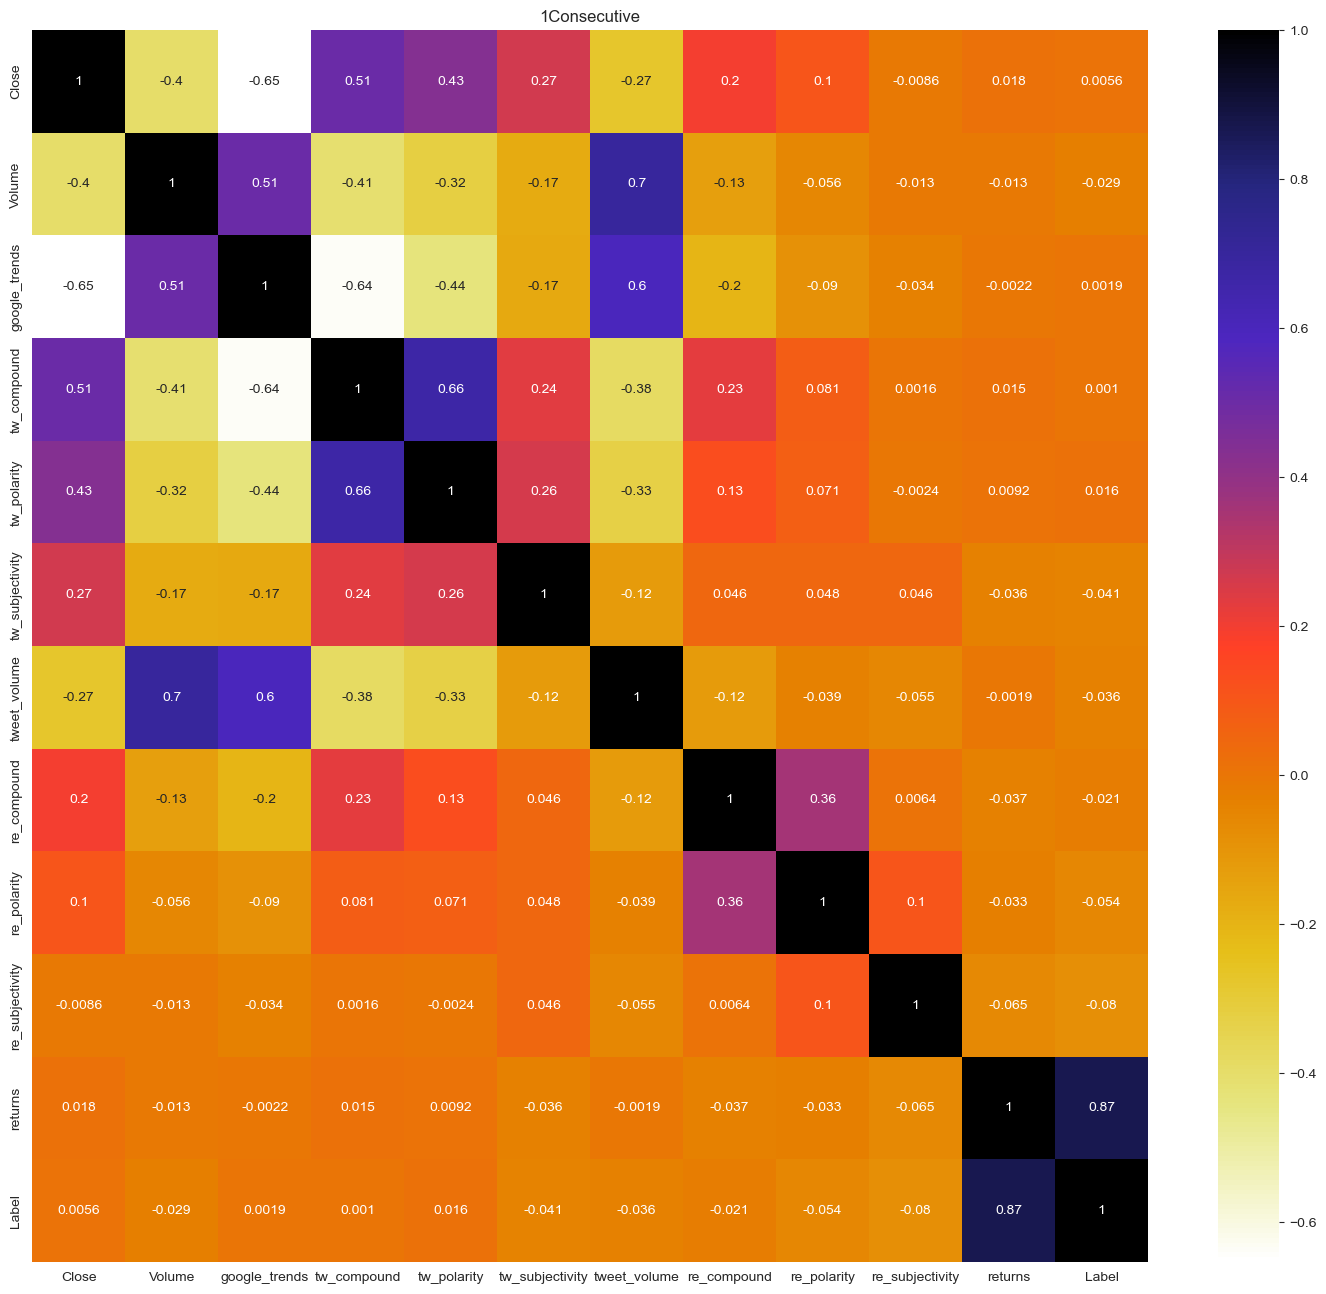

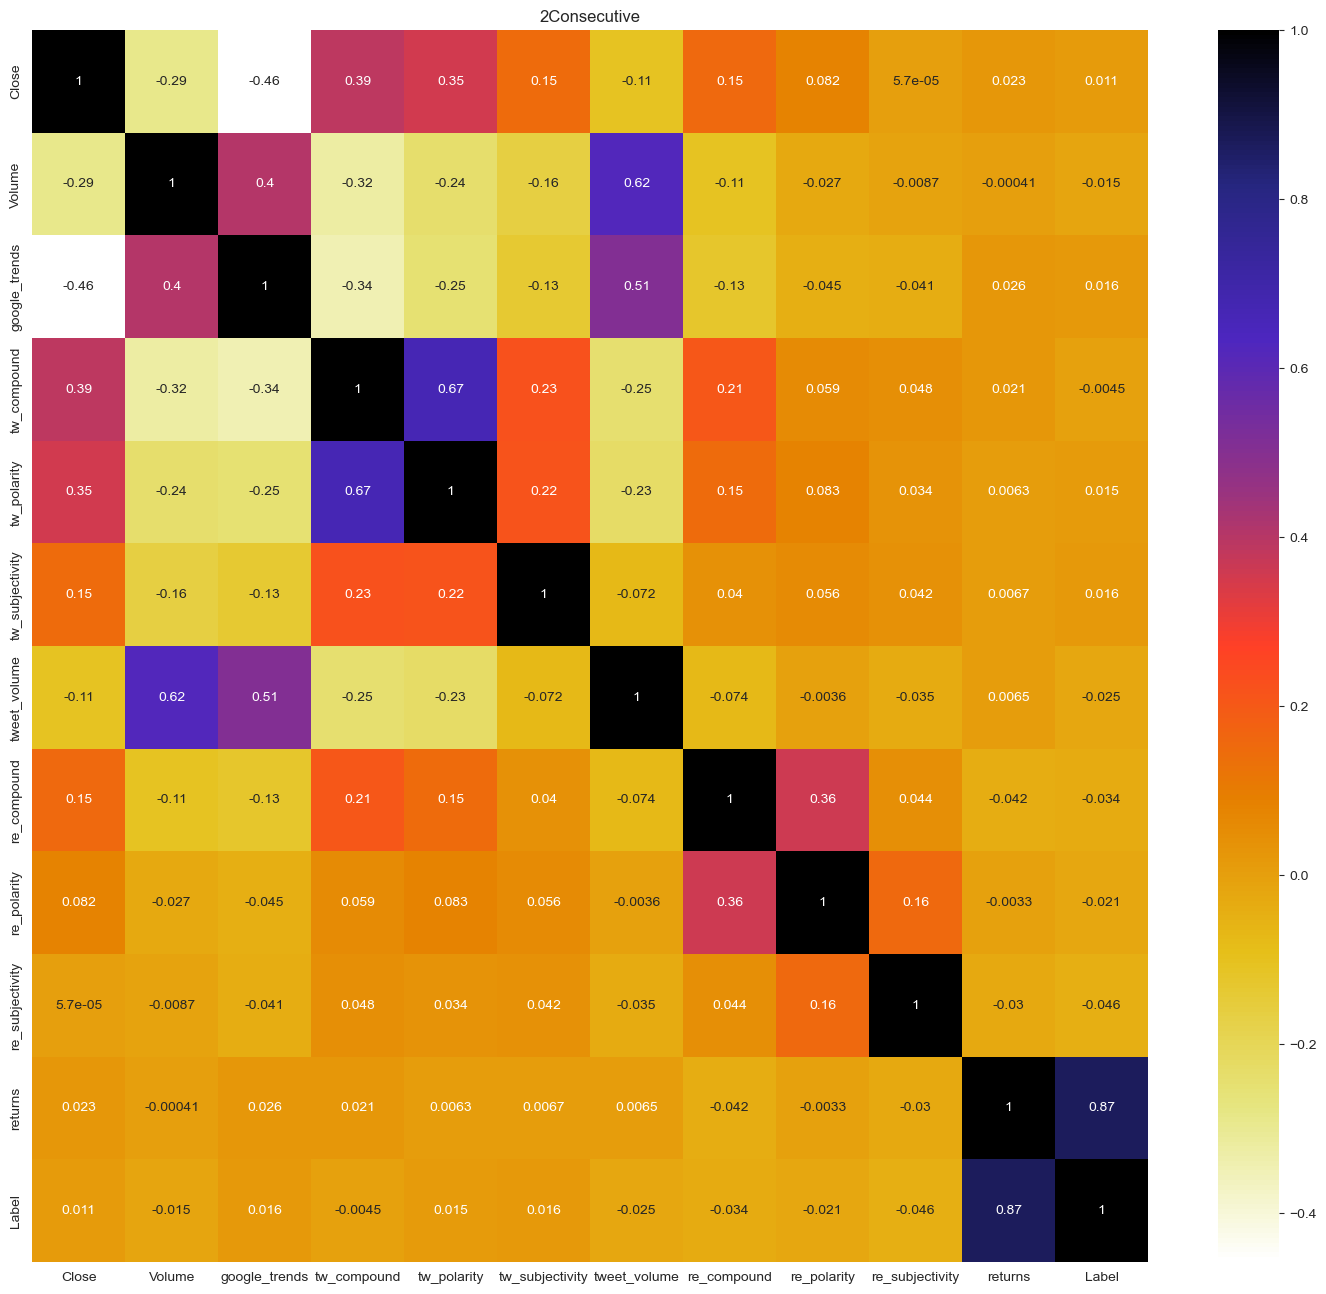

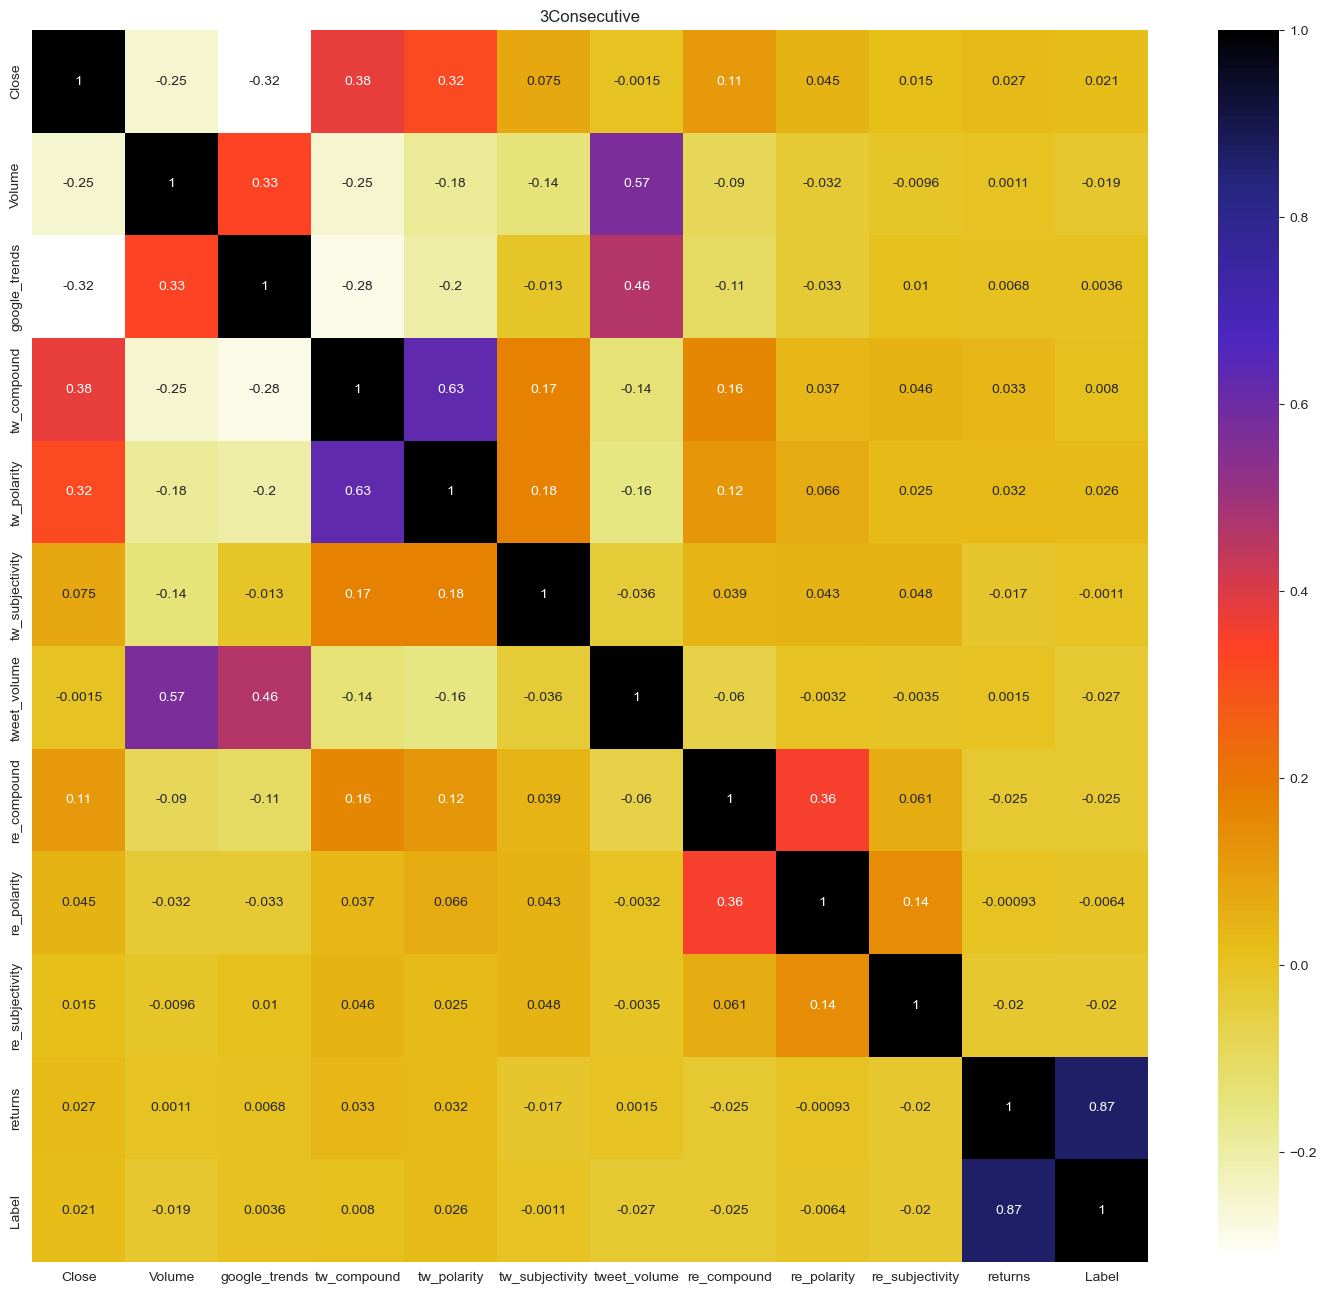

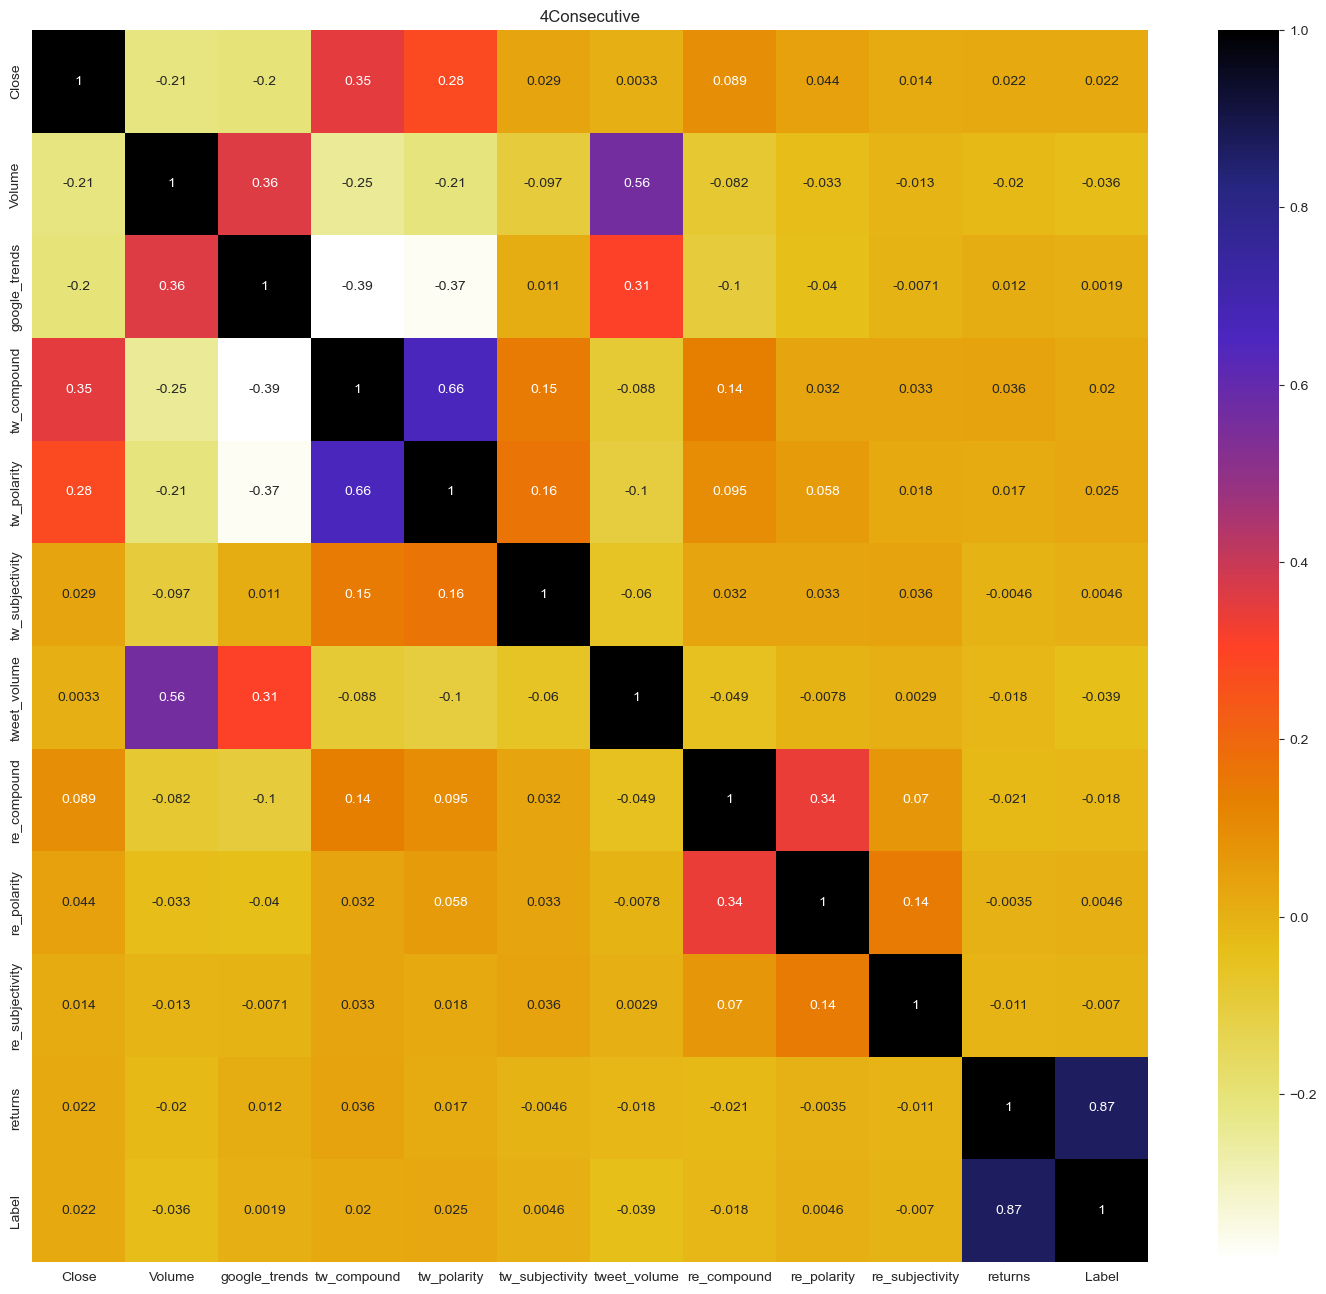

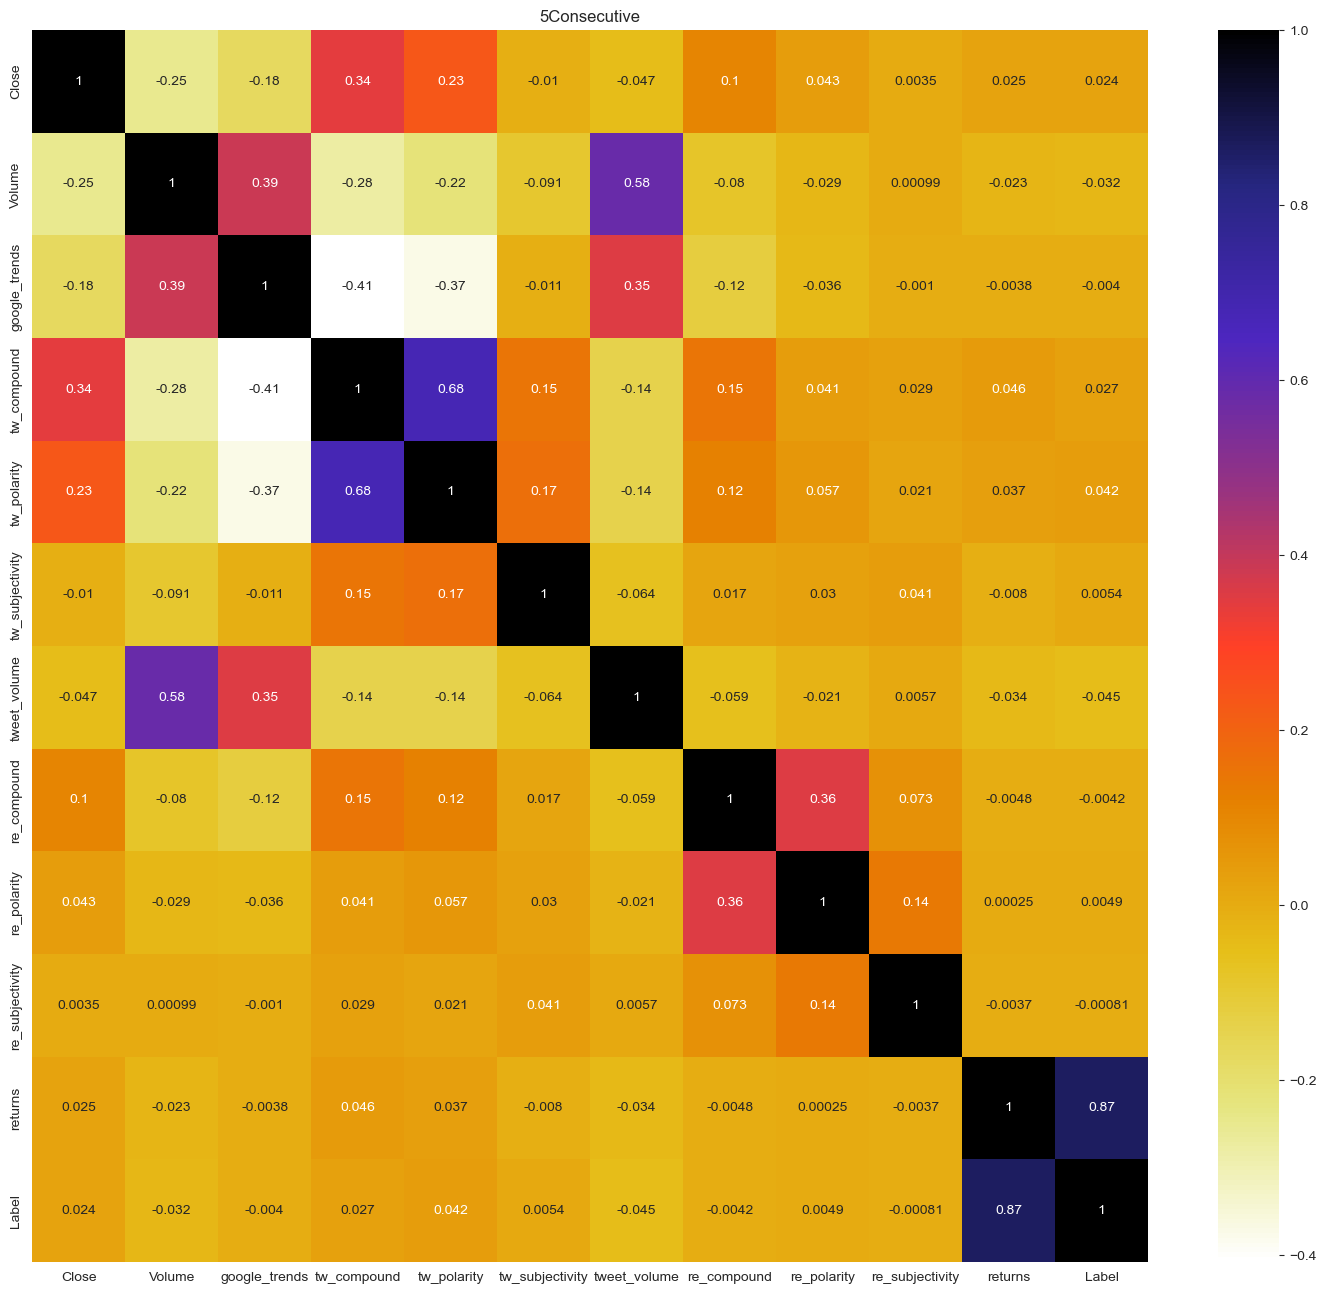

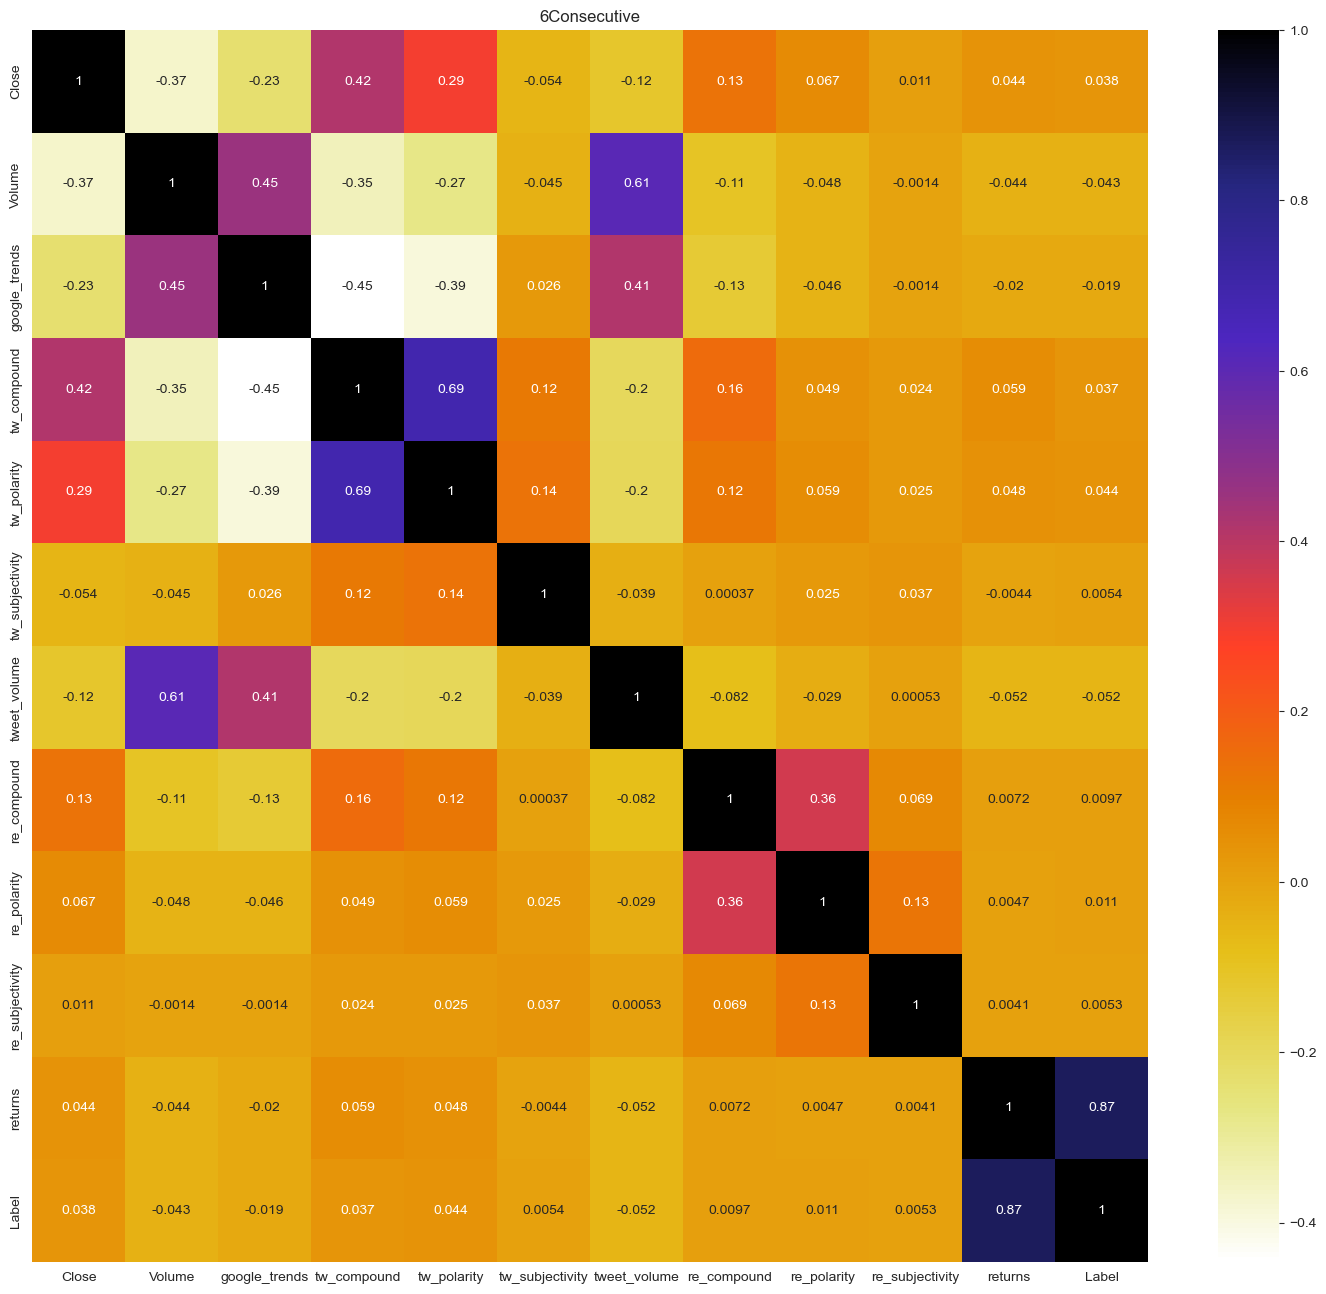

In [20]:
flag=1
for m in tqdm(month, total=len(month)):
    sub_data_test(flag, m, data)

 33%|███▎      | 2/6 [00:00<00:00, 12.83it/s]

Consecutive Months: 1
Consecutive Months: 2
Consecutive Months: 3


 67%|██████▋   | 4/6 [00:00<00:00, 12.83it/s]

Consecutive Months: 4
Consecutive Months: 5
Consecutive Months: 6


100%|██████████| 6/6 [00:00<00:00, 10.43it/s]


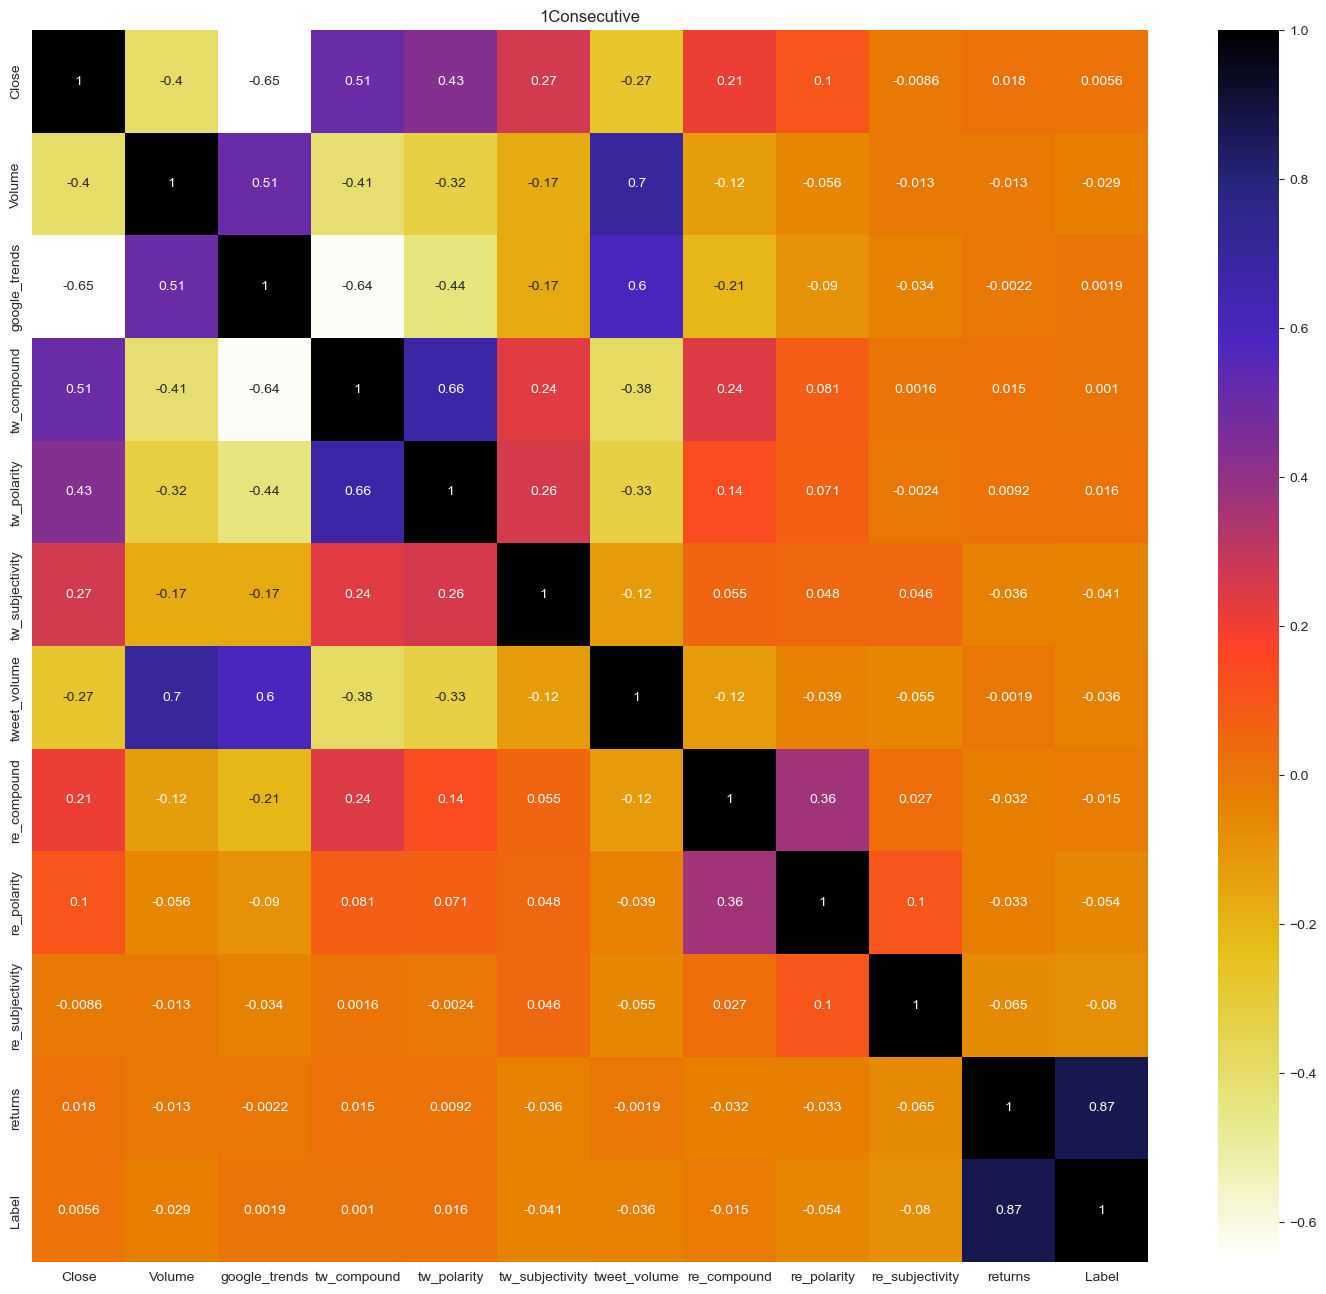

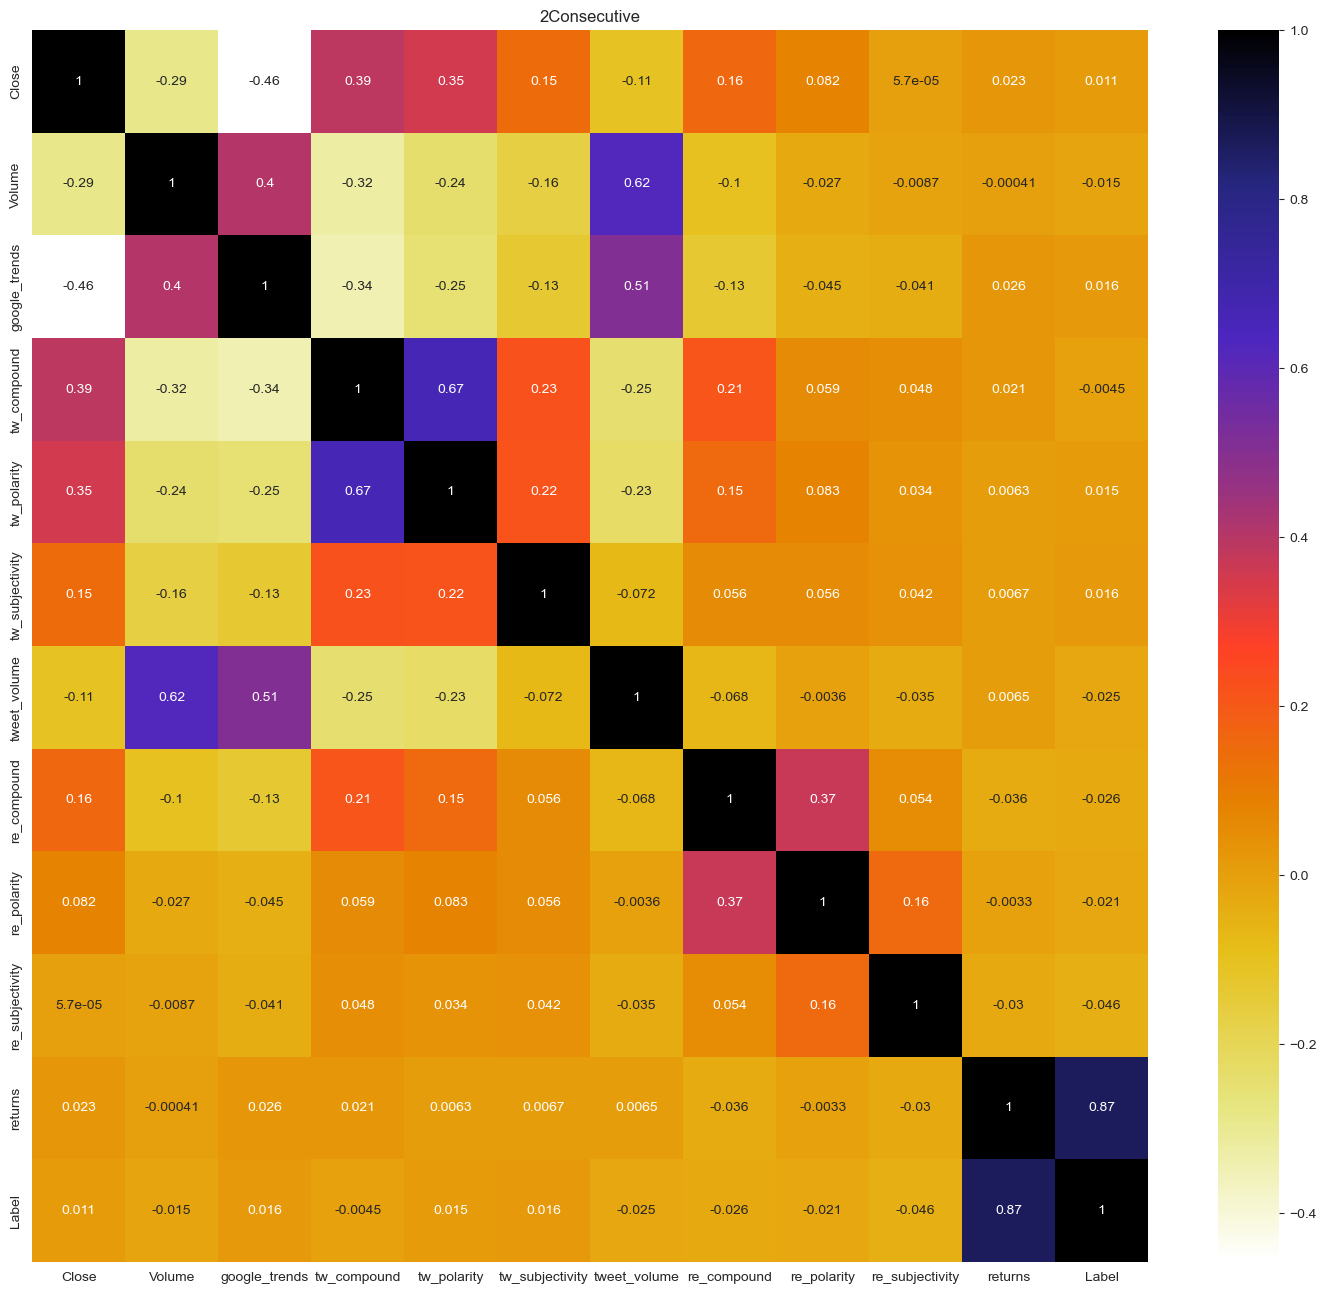

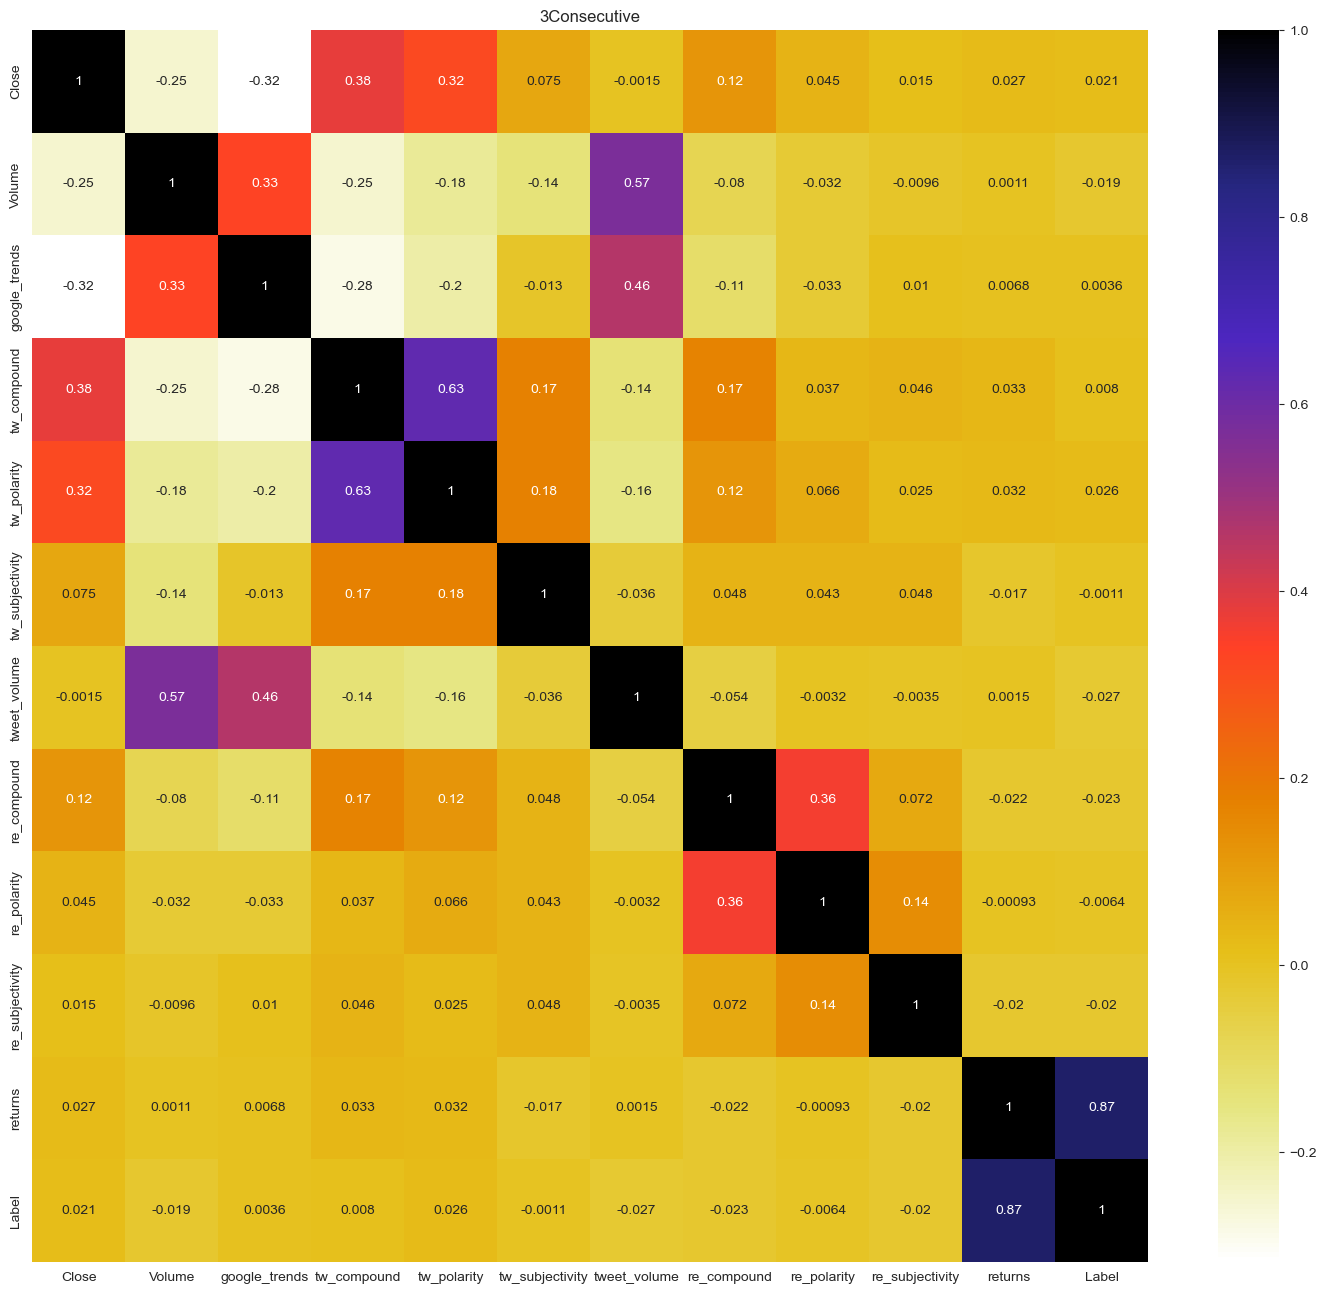

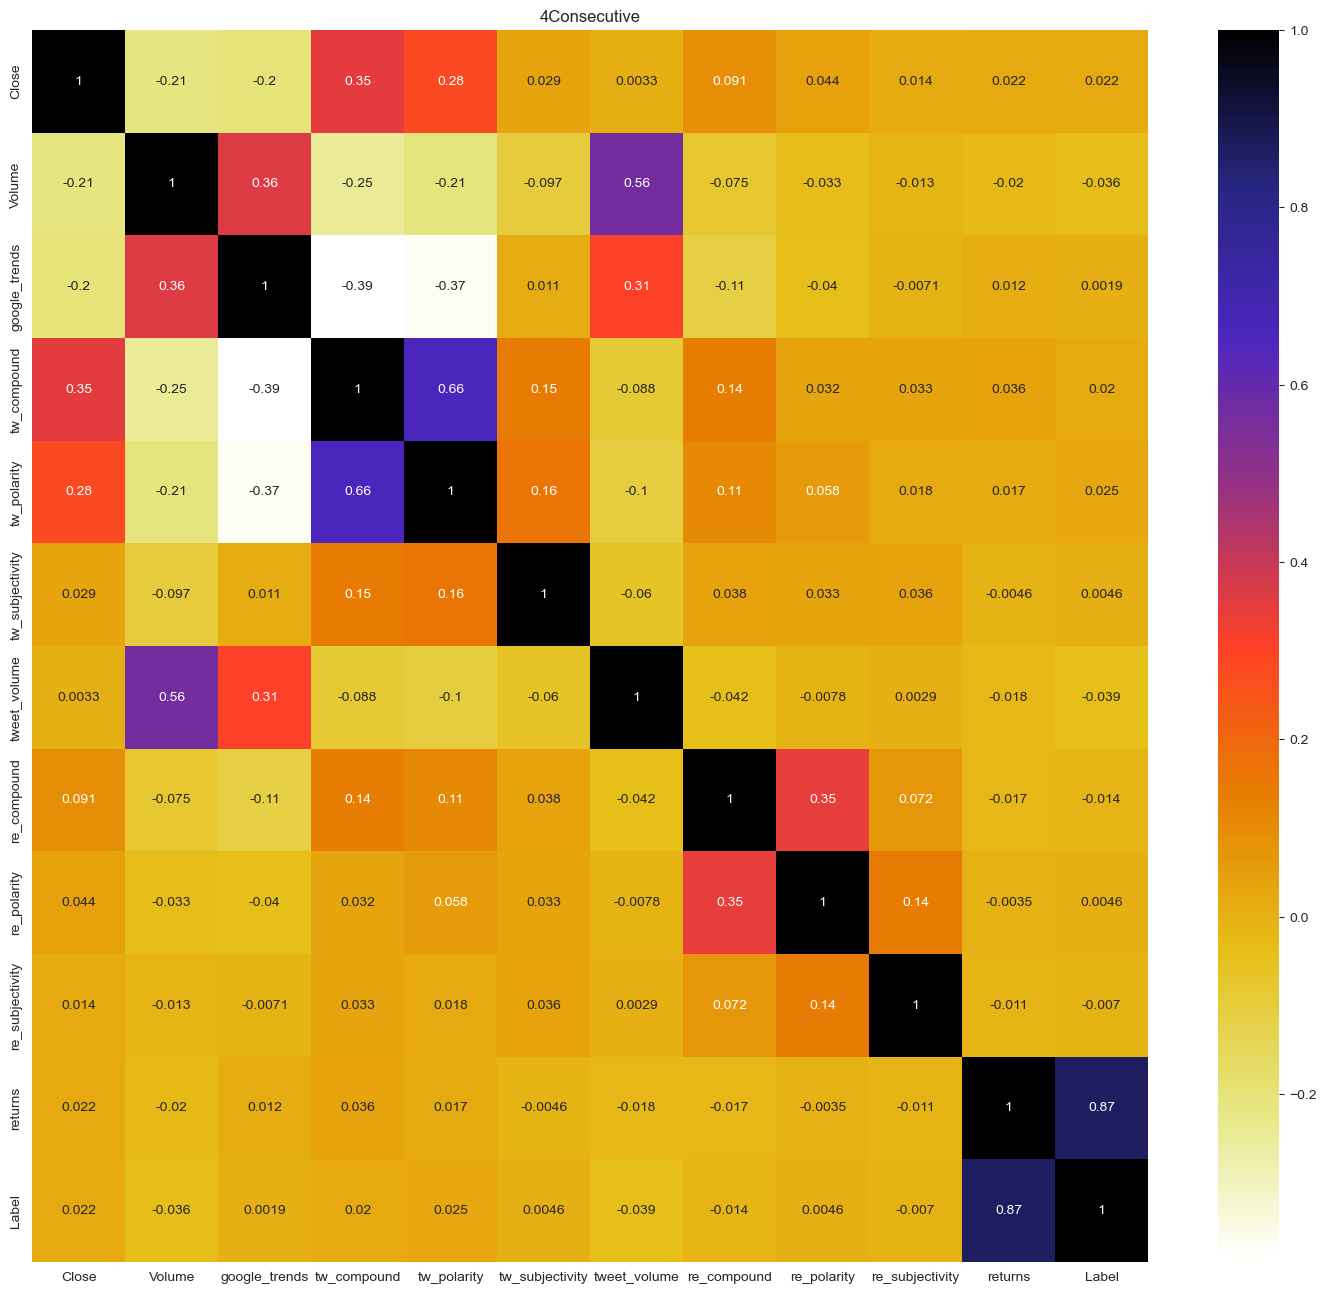

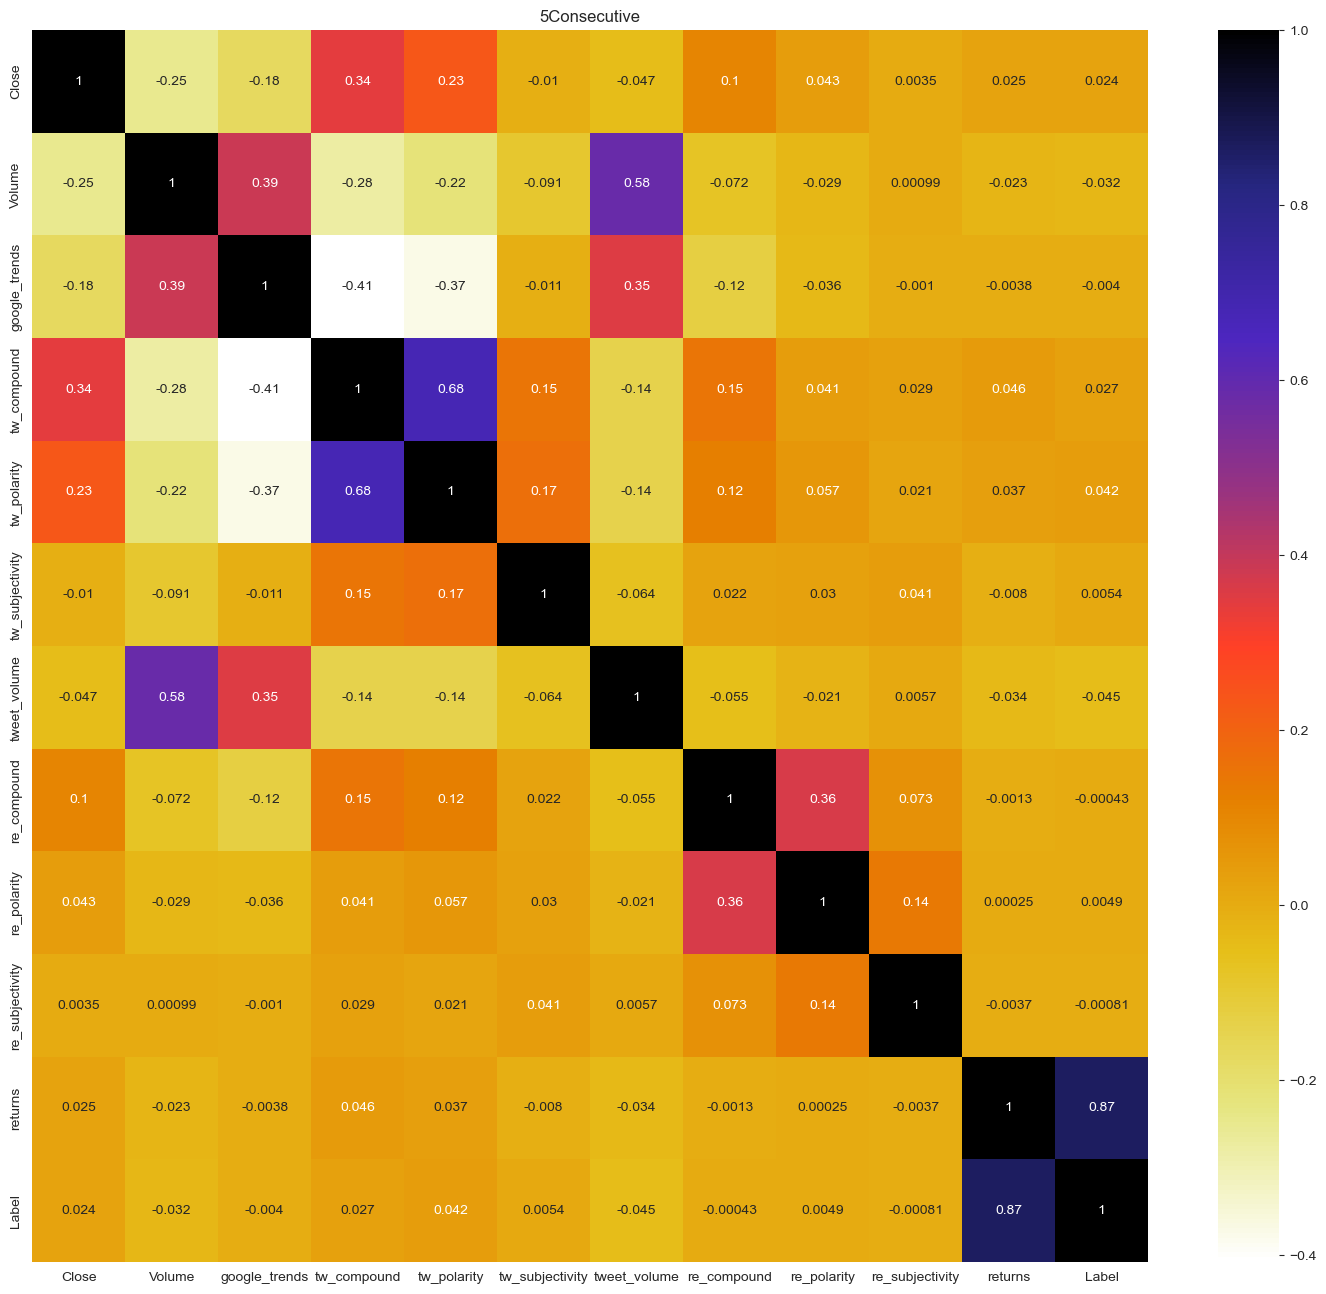

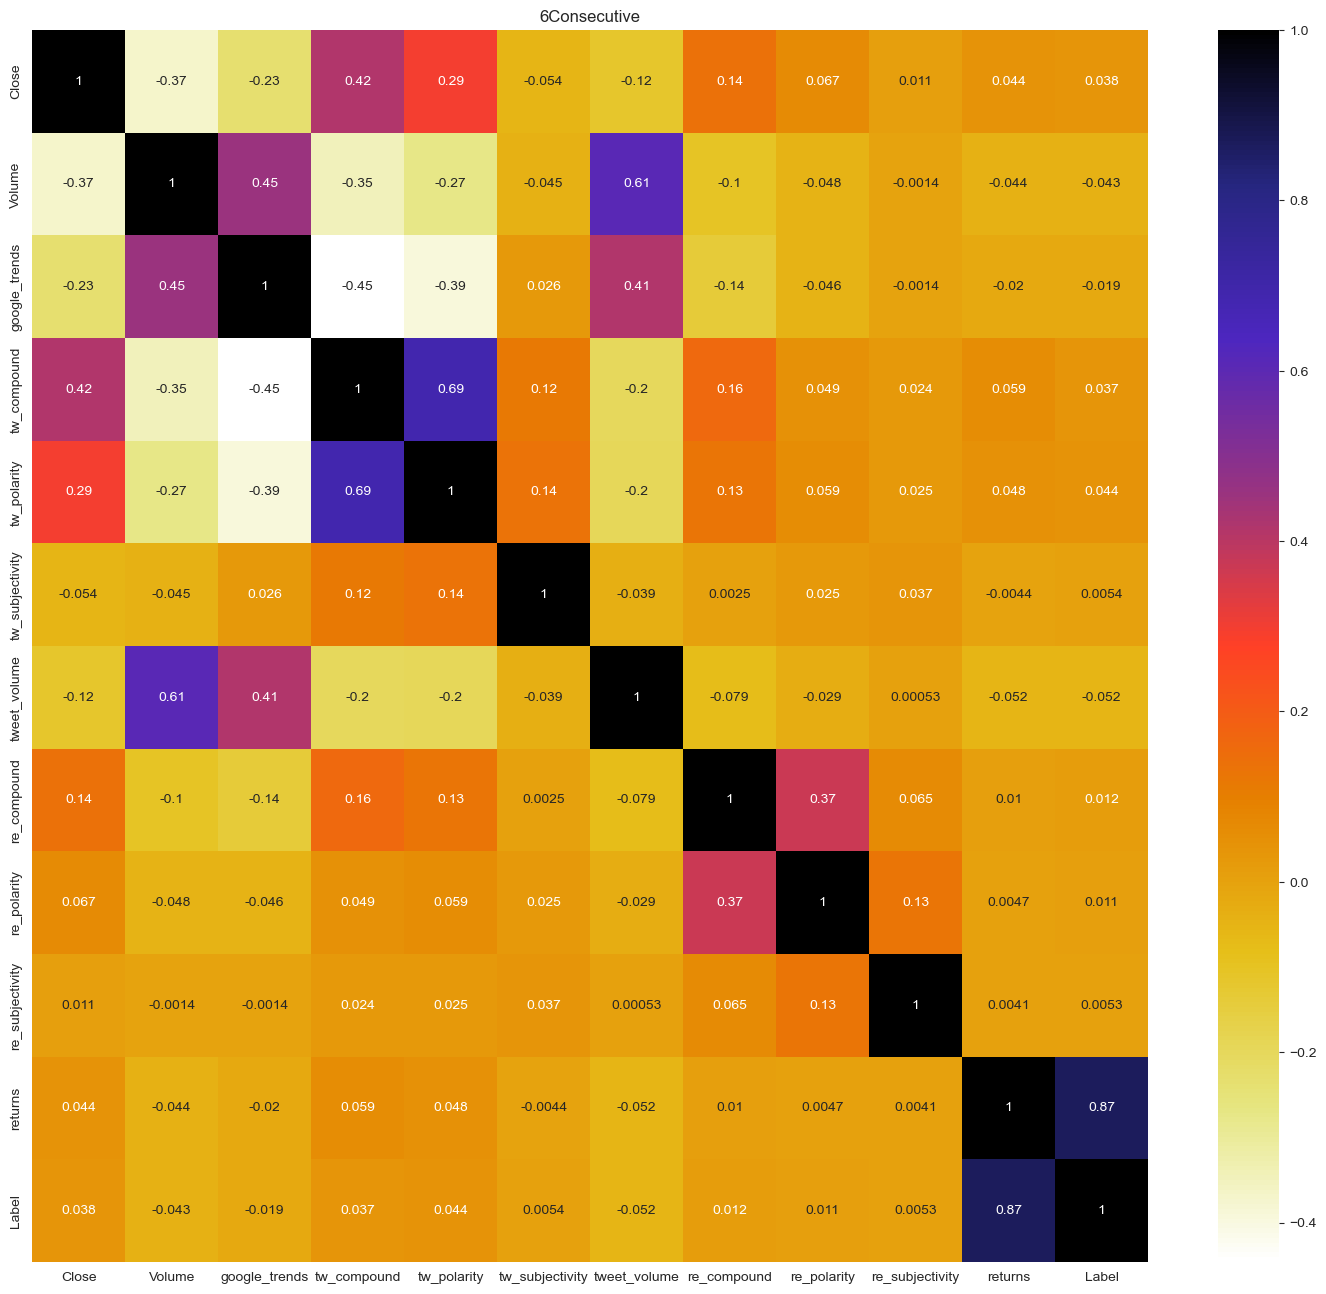

In [21]:
flag=1
for m in tqdm(month, total=len(month)):
    sub_data_test(flag, m, data_4)

 33%|███▎      | 2/6 [00:00<00:00, 12.44it/s]

Consecutive Months: 1
no columns
Consecutive Months: 2
no columns
Consecutive Months: 3
no columns


 67%|██████▋   | 4/6 [00:00<00:00, 12.15it/s]

Consecutive Months: 4
no columns
Consecutive Months: 5
no columns
Consecutive Months: 6
no columns


100%|██████████| 6/6 [00:00<00:00, 11.94it/s]


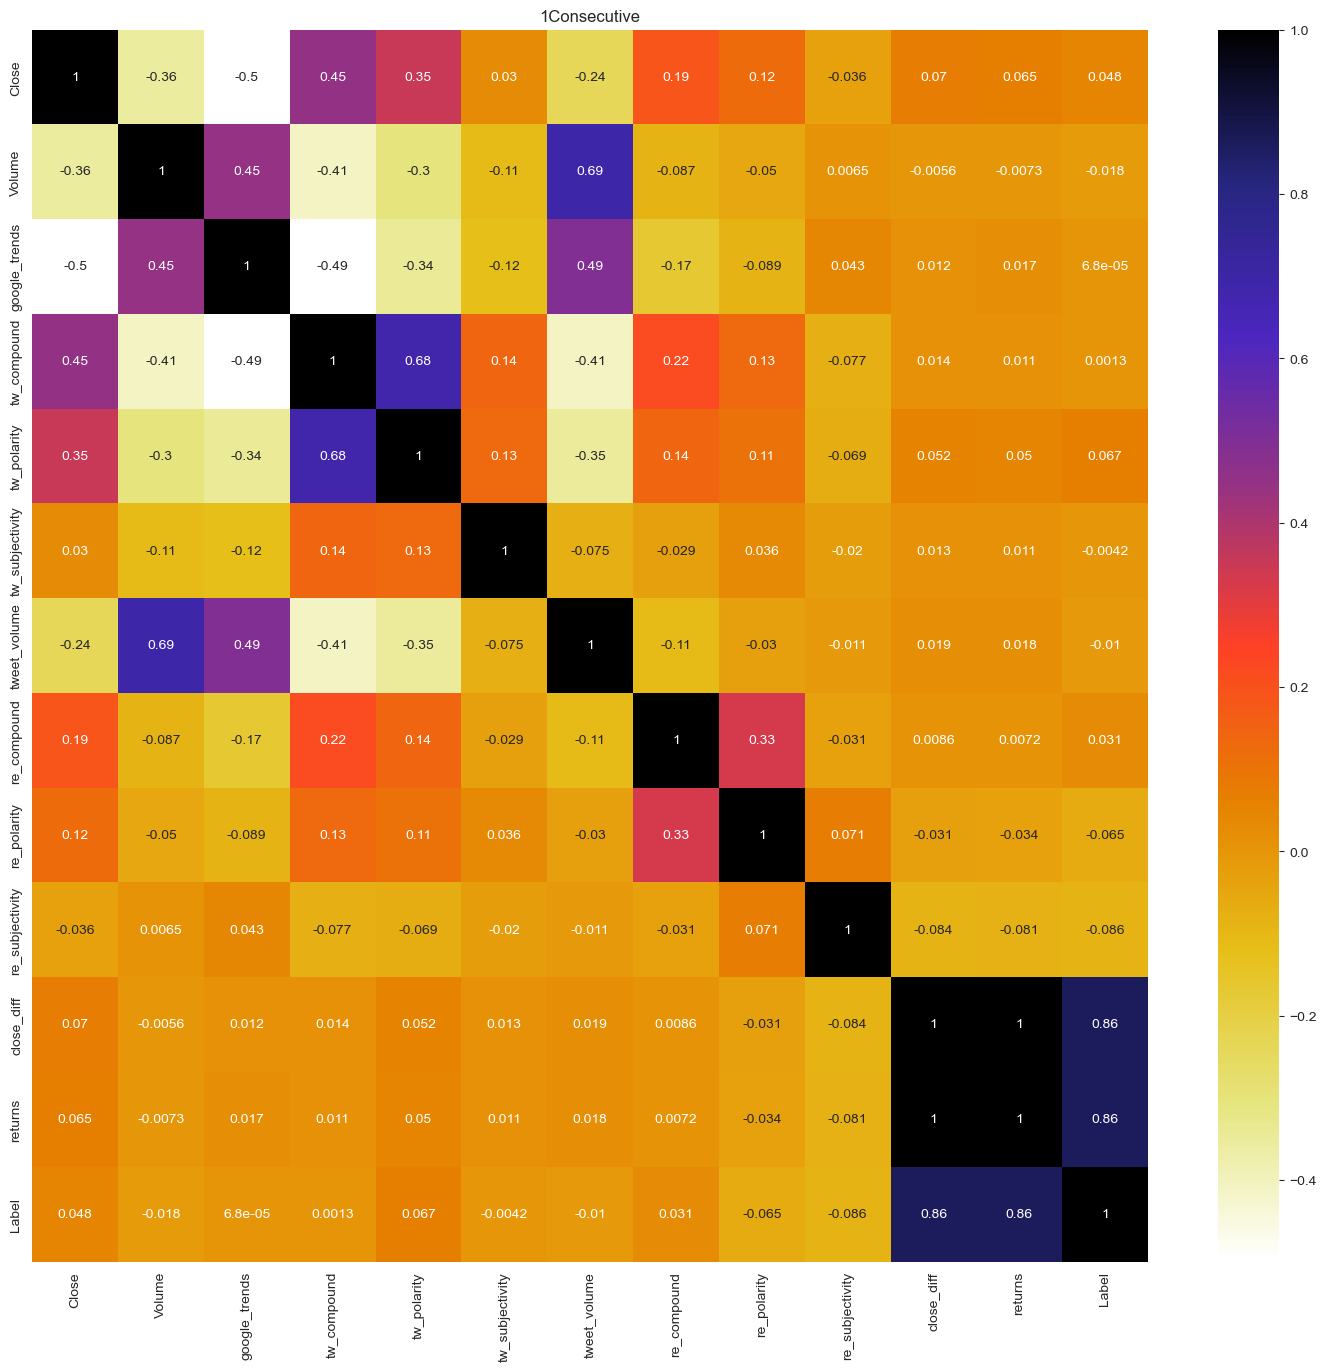

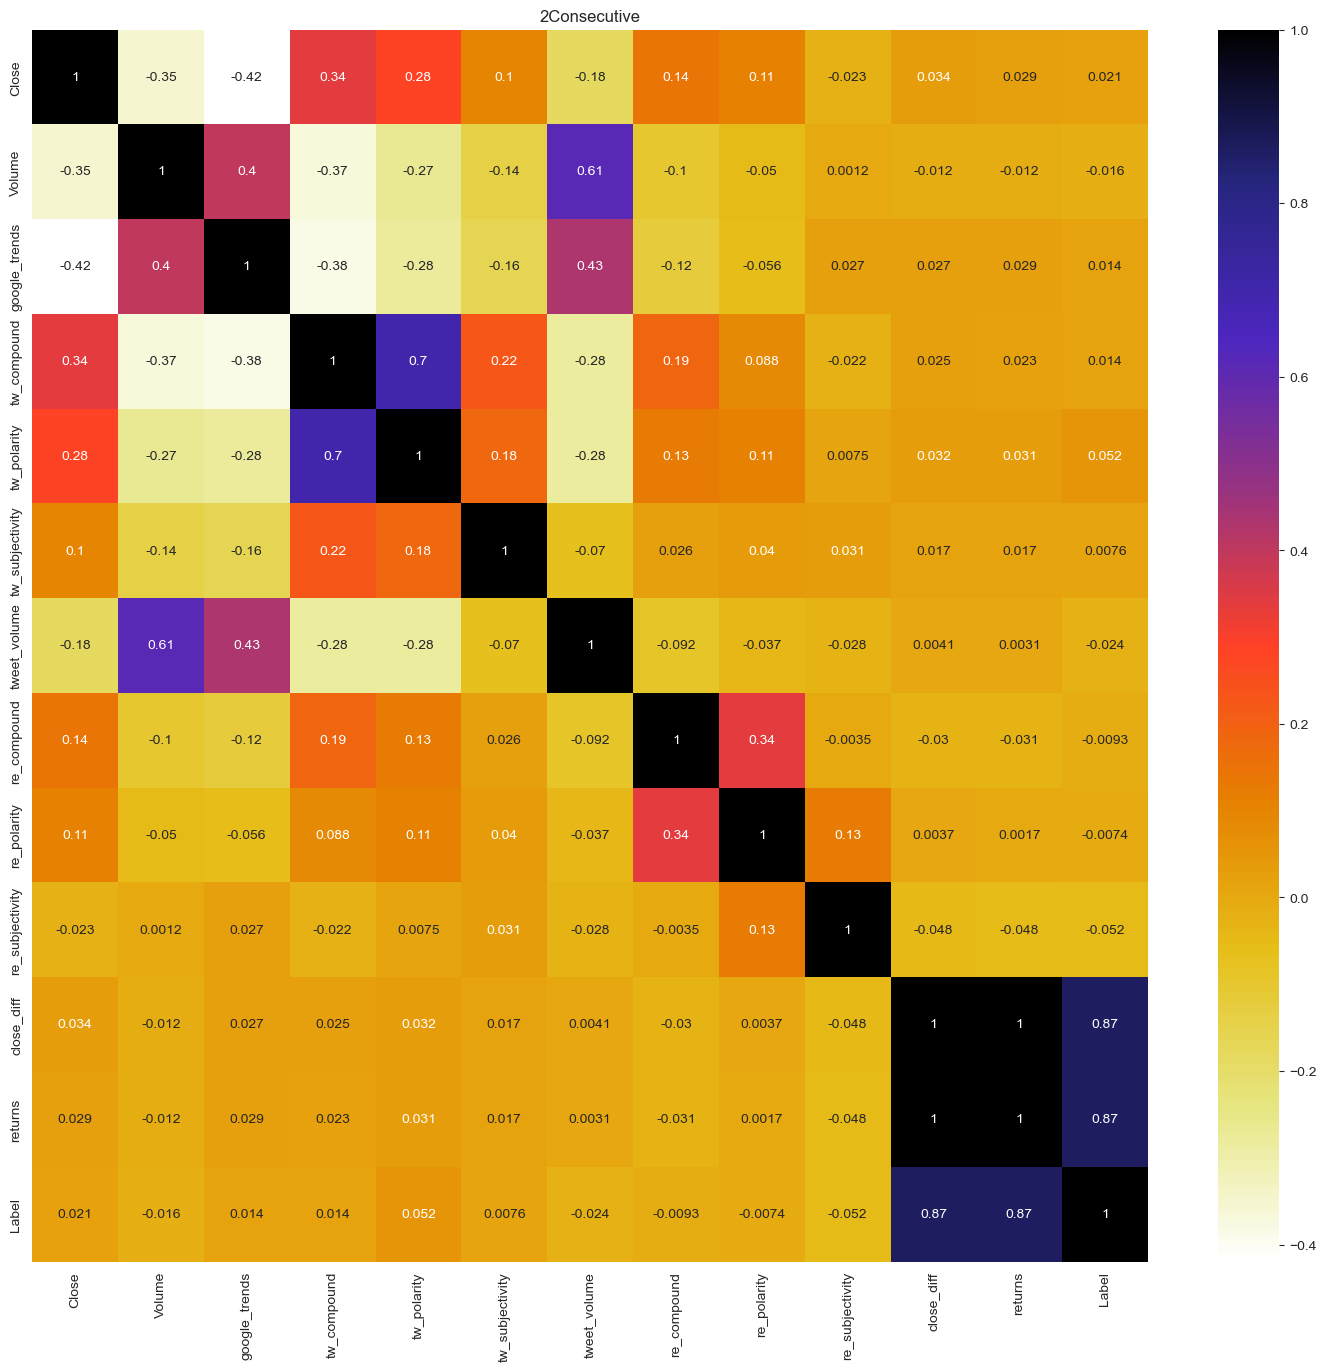

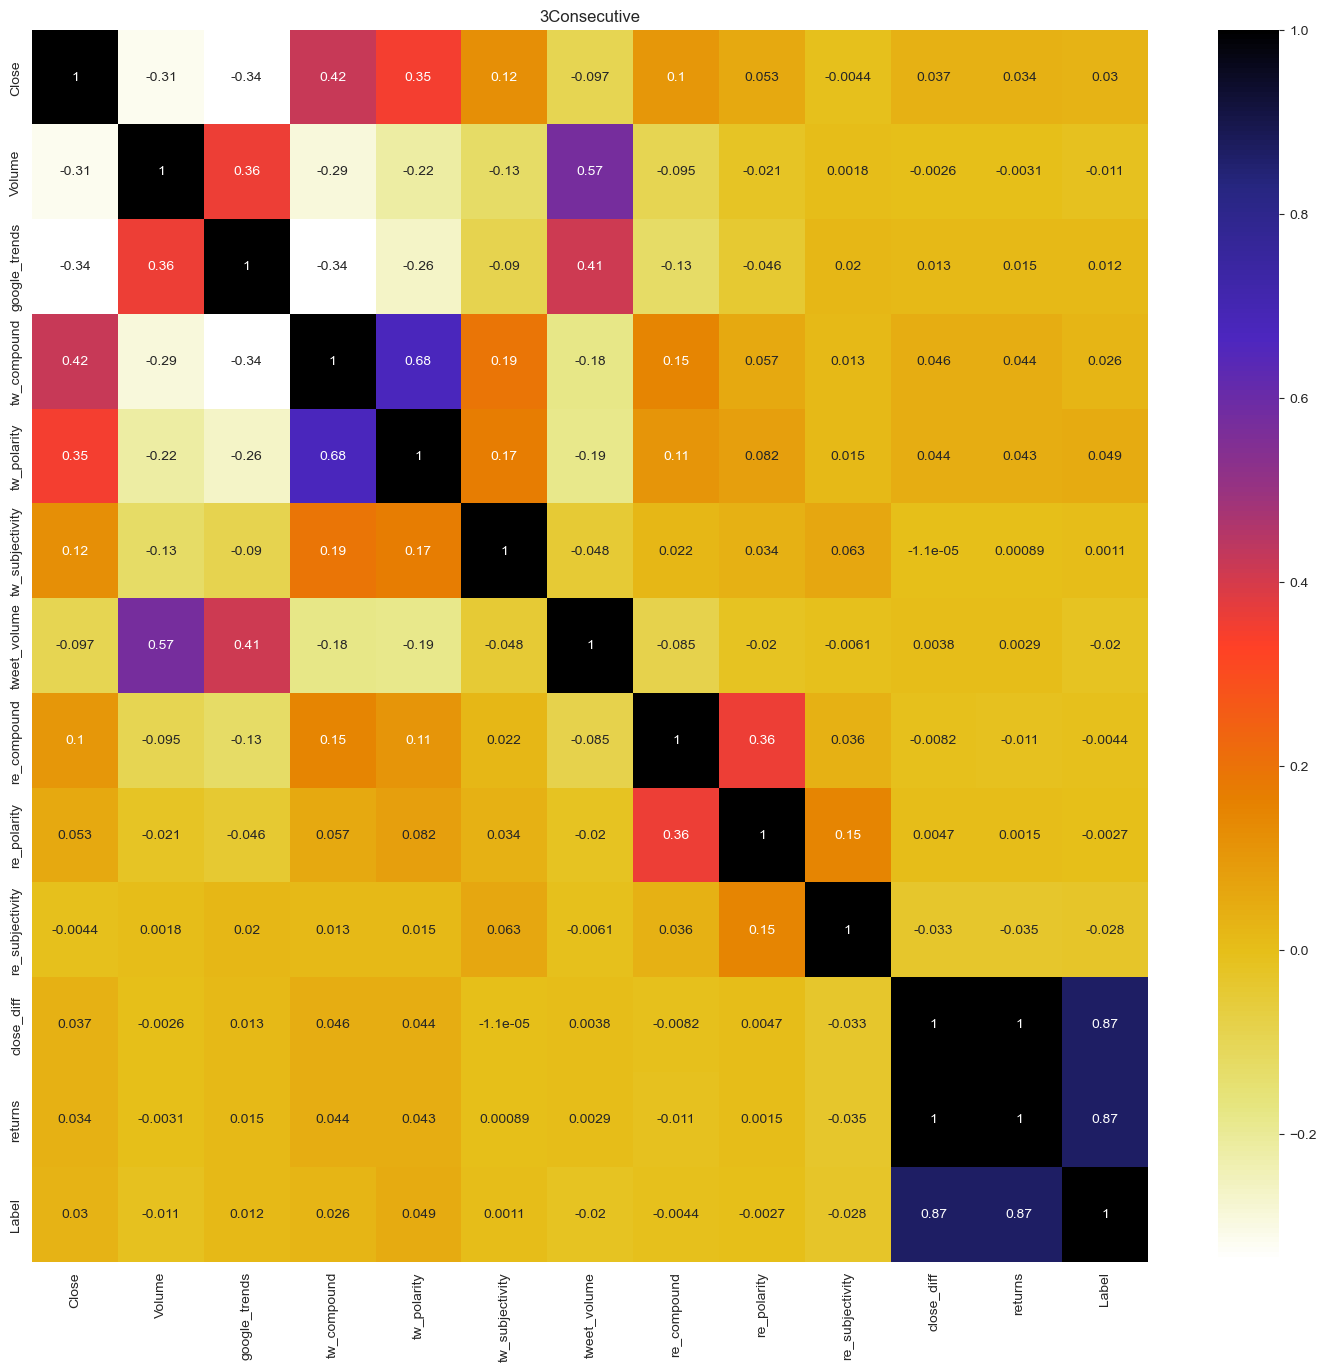

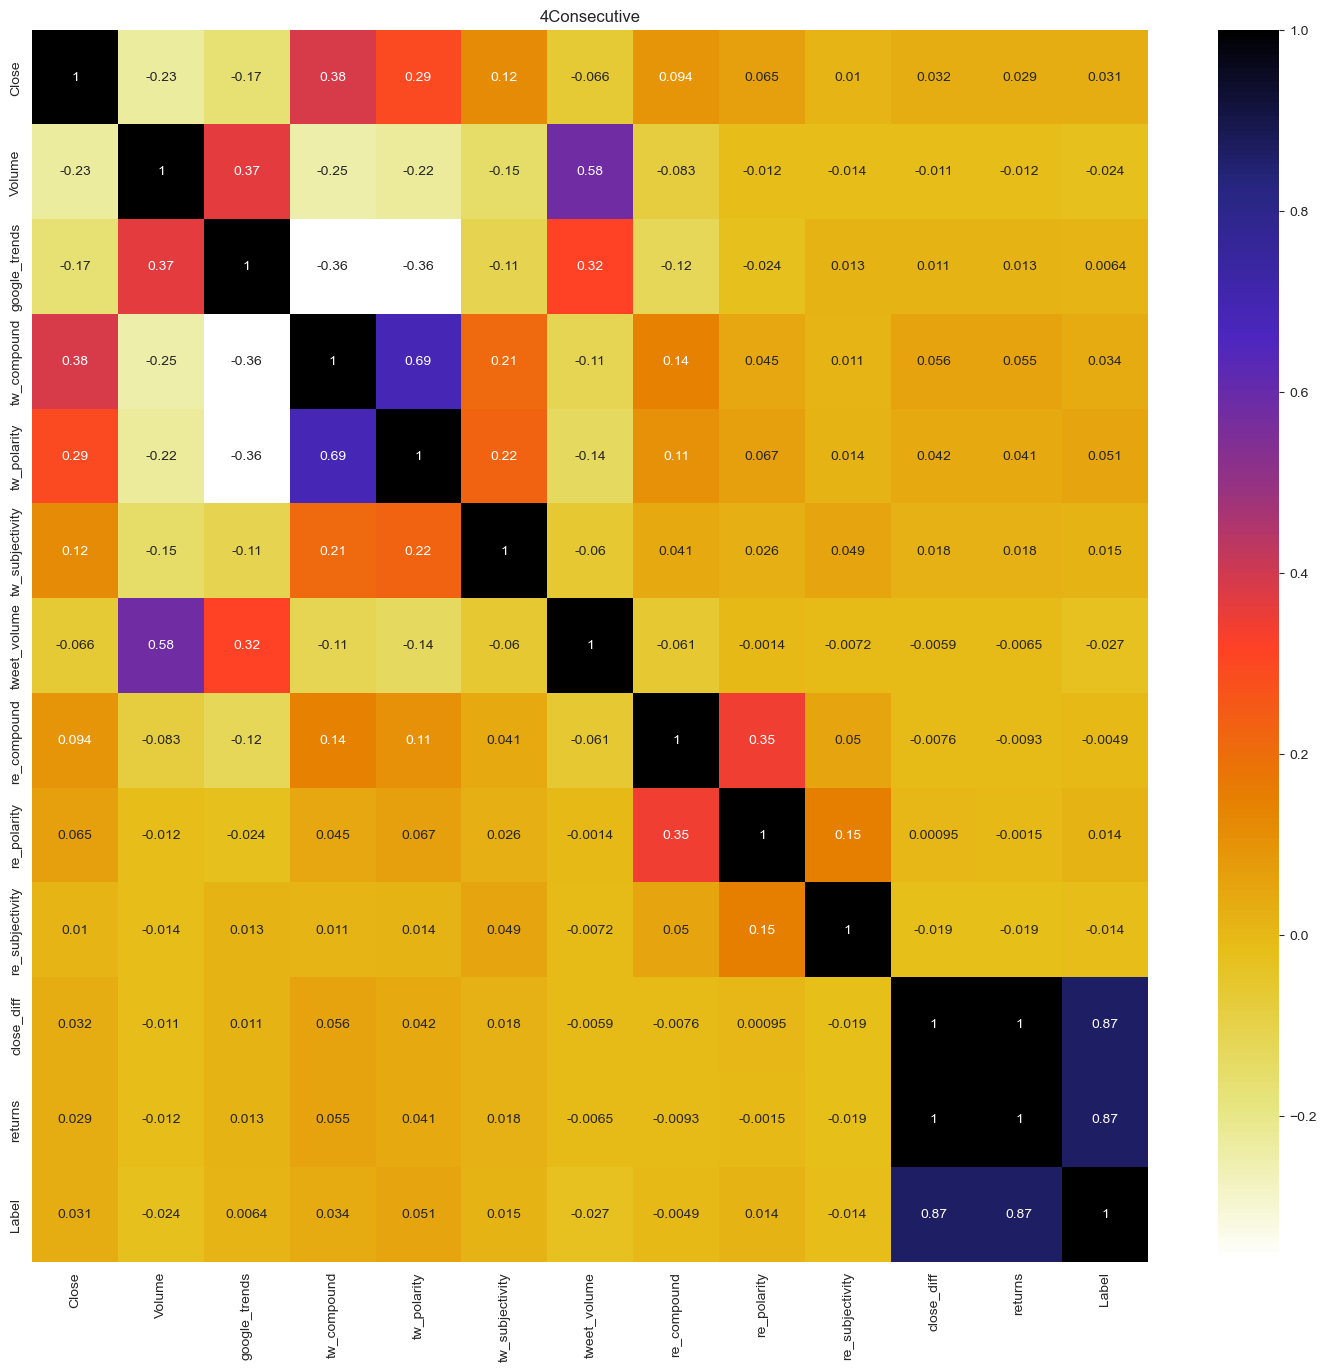

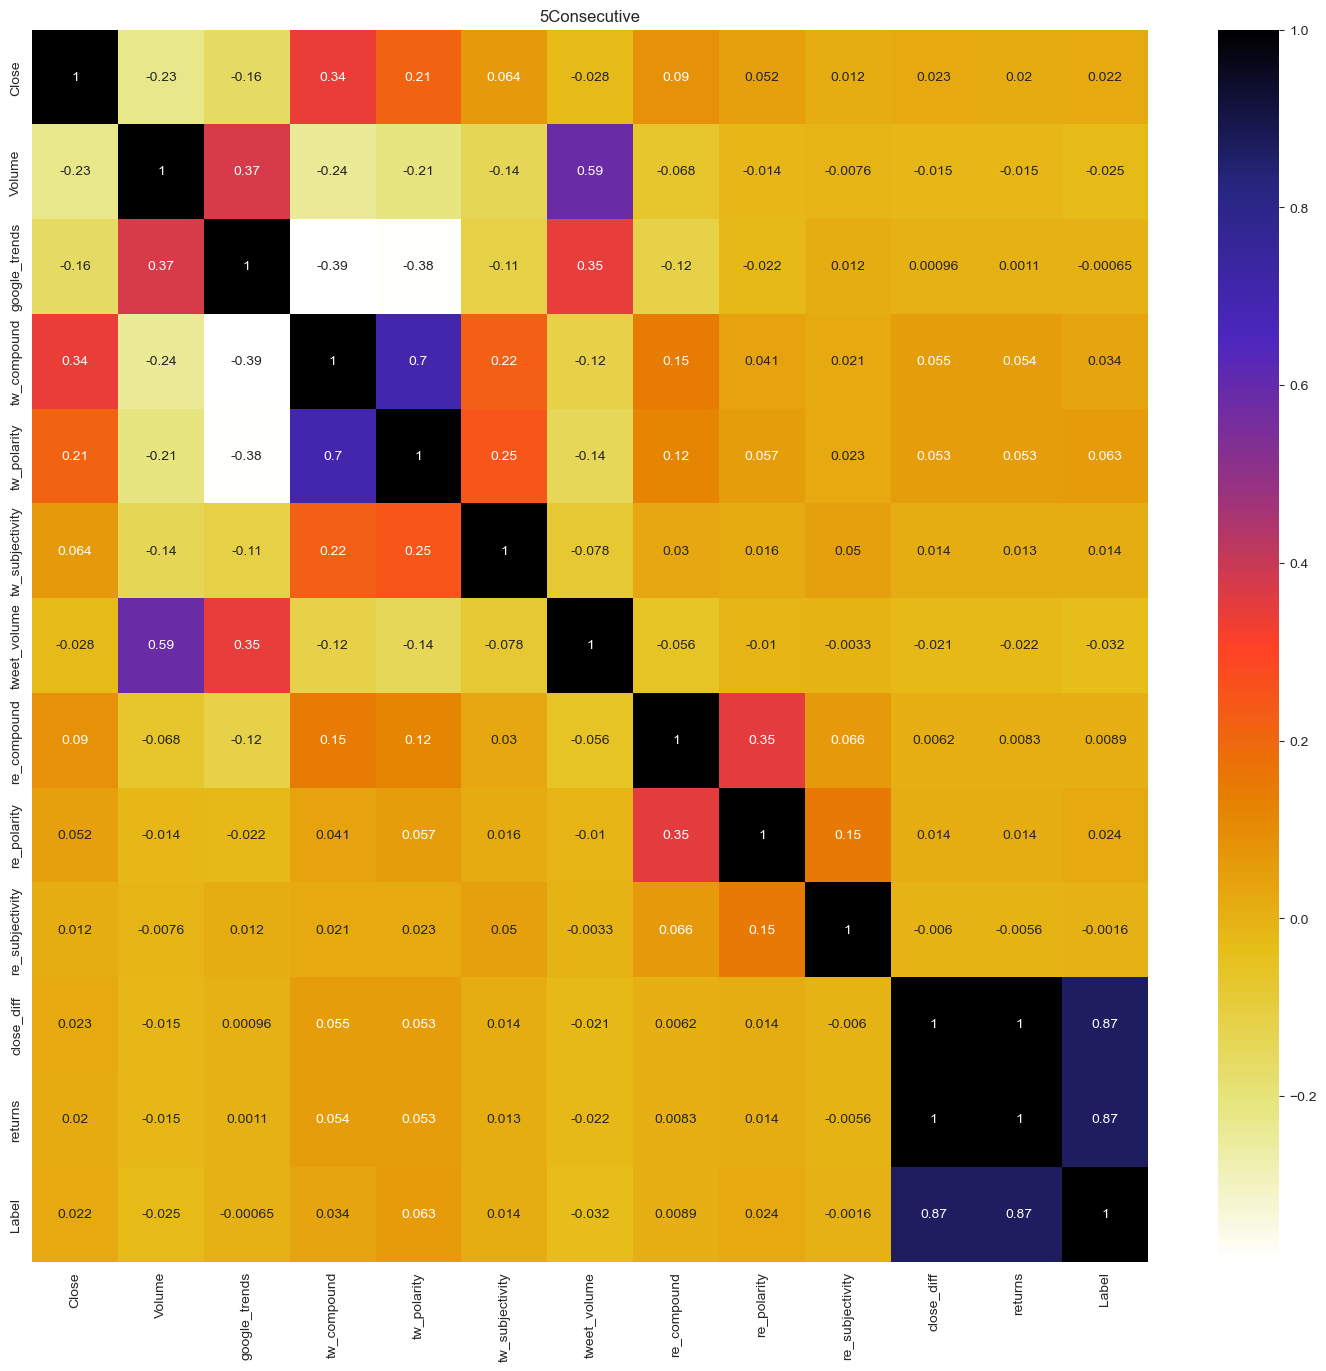

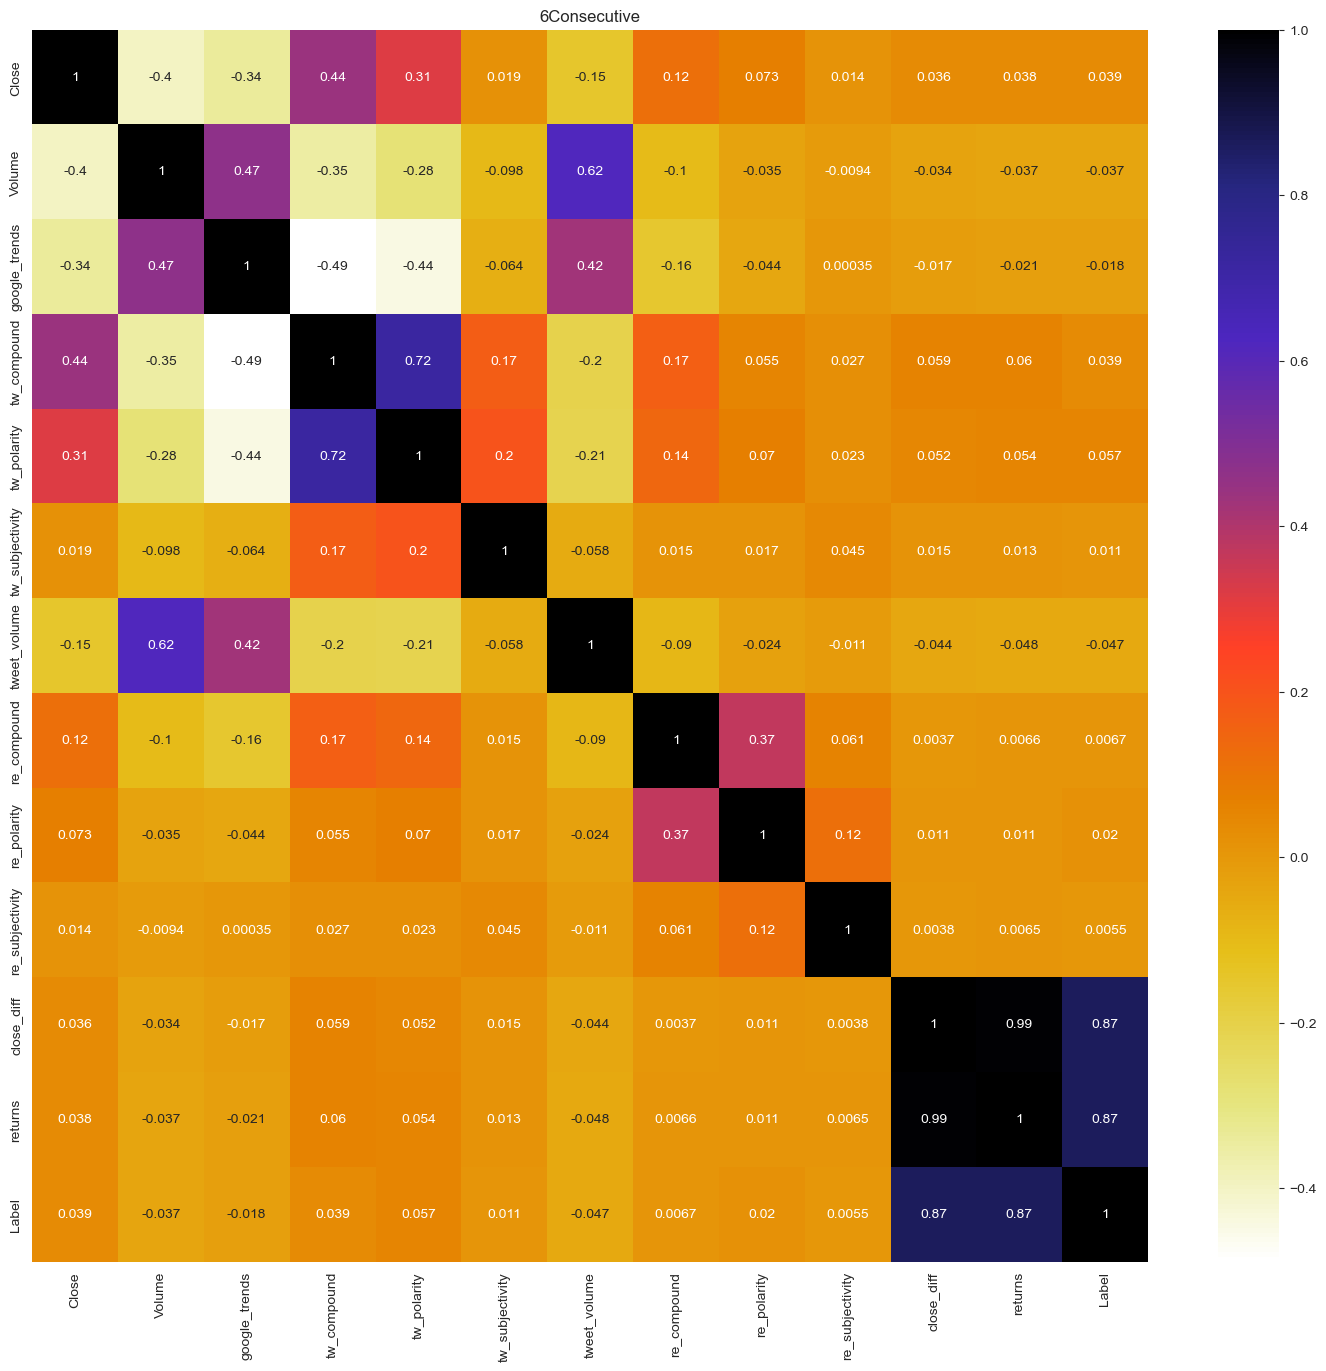

In [22]:
flag=1
for m in tqdm(month, total=len(month)):
    sub_data_test(flag, m, data_2)